## UCI Adult Income Dataset- Exploratory and Descriptive Analysis

In [1]:
# Import Libararies
import pandas as pd
import numpy as np
import os
import plotly.express as px

## Define and Create paths

In [2]:
# Get working directory
current_dir= os.getcwd()
# Go one directory up to the root directory
project_root_dir= os.path.dirname(current_dir)
project_root_dir
# Define paths to docs folder
data_dir= os.path.join(project_root_dir,'Data')
raw_dir= os.path.join(data_dir,'Raw')
processed_dir=os.path.join(data_dir,'Processed')
# Define paths to docs folder
results_dir=os.path.join(project_root_dir,'Results')
docs_dir=os.path.join(project_root_dir,'Docs')

# Create directories if they do not exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(docs_dir, exist_ok=True)

# Read in the data

In [3]:
adult_data_filename= os.path.join(processed_dir,"Adult_Result.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,Unnamed: 0,Age,Work_class,Fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Native_country,Income,Education_Level,Occupation_grouped,Native_place,Age_group
0,0,39,government,77516,bachelors,13,single,adm-clerical,single,white,male,2174,0,40,united-states,<=50k,tertiary,white collar,north america,36-45
1,1,50,self-employed,83311,bachelors,13,married,exec-managerial,male spouse,white,male,0,0,13,united-states,<=50k,tertiary,white collar,north america,46-60
2,2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,single,white,male,0,0,40,united-states,<=50k,high school graduate,blue collar,north america,36-45
3,3,53,private,234721,11th,7,married,handlers-cleaners,male spouse,black,male,0,0,40,united-states,<=50k,secondary,blue collar,north america,46-60
4,4,28,private,338409,bachelors,13,married,prof-specialty,female spouse,black,female,0,0,40,cuba,<=50k,tertiary,white collar,central america,26-35
5,5,37,private,284582,masters,14,married,exec-managerial,female spouse,white,female,0,0,40,united-states,<=50k,tertiary,white collar,north america,36-45
6,6,49,private,160187,9th,5,divorced or separated,other-service,single,black,female,0,0,16,jamaica,<=50k,secondary,service,central america,46-60
7,7,52,self-employed,209642,hs-grad,9,married,exec-managerial,male spouse,white,male,0,0,45,united-states,>50k,high school graduate,white collar,north america,46-60
8,8,31,private,45781,masters,14,single,prof-specialty,single,white,female,14084,0,50,united-states,>50k,tertiary,white collar,north america,26-35
9,9,42,private,159449,bachelors,13,married,exec-managerial,male spouse,white,male,5178,0,40,united-states,>50k,tertiary,white collar,north america,36-45


# Check the shape of the dataset

In [4]:
adult_df.shape

(32536, 20)

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          32536 non-null  int64 
 1   Age                 32536 non-null  int64 
 2   Work_class          32536 non-null  object
 3   Fnlwgt              32536 non-null  int64 
 4   Education           32536 non-null  object
 5   Education_num       32536 non-null  int64 
 6   Marital_Status      32536 non-null  object
 7   Occupation          32536 non-null  object
 8   Relationship        32536 non-null  object
 9   Race                32536 non-null  object
 10  Sex                 32536 non-null  object
 11  Capital_Gain        32536 non-null  int64 
 12  Capital_Loss        32536 non-null  int64 
 13  Hours_per_week      32536 non-null  int64 
 14  Native_country      32536 non-null  object
 15  Income              32536 non-null  object
 16  Education_Level     32

## Summary Statistics
### Numerical Variable

In [6]:
adult_df.describe(include='object')

,Work_class,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_country,Income,Education_Level,Occupation_grouped,Native_place,Age_group
count,32536,32536,32536,32536,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,6,16,5,15,5,5,2,42,2,8,5,6,7
top,private,hs-grad,married,prof-specialty,male spouse,white,male,united-states,<=50k,high school graduate,white collar,north america,26-35
freq,22673,10494,14993,4136,13187,27794,21775,29152,24697,10494,16545,30040,8510


In [7]:
adult_df['Work_class'].value_counts(normalize=True)

Work_class
private          0.696859
government       0.133698
self-employed    0.112368
unkown           0.056430
voluntary        0.000430
unemployed       0.000215
Name: proportion, dtype: float64

In [8]:
adult_df['Marital_Status'].value_counts(normalize=True)

Marital_Status
married                  0.460813
single                   0.327821
divorced                 0.136495
divorced or separated    0.044351
widowed                  0.030520
Name: proportion, dtype: float64

In [9]:
adult_df['Relationship'].value_counts(normalize=True)

Relationship
male spouse          0.405305
single               0.360708
child                0.155643
female spouse        0.048193
extended relative    0.030151
Name: proportion, dtype: float64

In [10]:
adult_df['Race'].value_counts(normalize=True)

Race
white                        0.854254
black                        0.095955
asian or pacific islander    0.031903
american indian or eskimo    0.009559
other                        0.008329
Name: proportion, dtype: float64

## Income Distriution

In [11]:
adult_df_income= adult_df.groupby('Income').size().reset_index(name = "Total")
adult_df_income

,Income,Total
0,<=50k,24697
1,>50k,7839


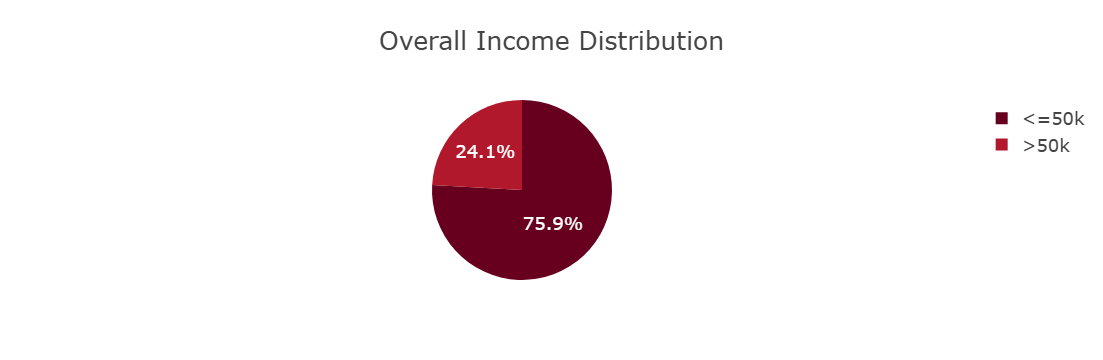

In [12]:
fig = px.pie(adult_df_income, names='Income',values='Total',title='Overall Income Distribution',color_discrete_sequence= px.colors.sequential.RdBu)
#fig.update_layout(template= 'presentation',paper_bgcolor= "rgba(0,0,0,0)",plot_bgcolor = "rgba(0,0,0,0)")
fig.show()
#fig.write_image(os.path.join(result_dir,'income Distribution_pie_chart.jpg'))
#fig.write_image(os.path.join(result_dir,'income Distribution_pie_chart.png'))
#fig.write_image(os.path.join(result_dir,'income Distribution_pie_chart.html'))

### Income by Age Group

In [13]:
adult_df_income_age = (
    adult_df.groupby(['Age_group', 'Income'])
    .size()
    .reset_index(name='total_by_age')
    .sort_values(['Age_group', 'Income'])
)

adult_df_income_age

,Age_group,Income,total_by_age
0,18-25,<=50k,5340
1,18-25,>50k,114
2,26-35,<=50k,6919
3,26-35,>50k,1591
4,36-45,<=50k,5233
5,36-45,>50k,2772
6,46-60,<=50k,4480
7,46-60,>50k,2811
8,61-75,<=50k,1580
9,61-75,>50k,511


In [14]:
total_per_group = adult_df_income_age.groupby('Age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group) * 100

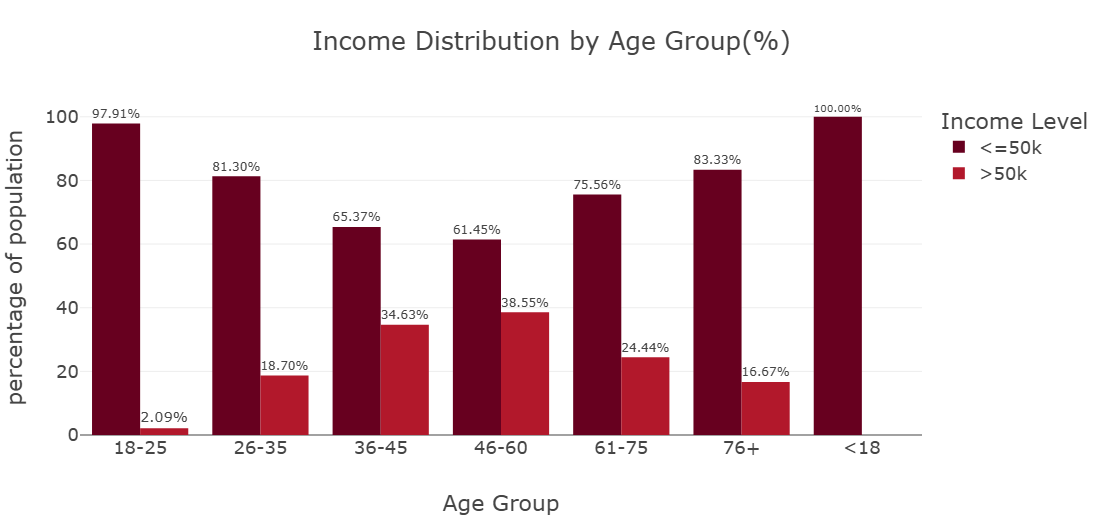

In [15]:
fig = px.bar(
    adult_df_income_age,
    x = "Age_group",
    y = "percentage",
    color = "Income",
    title ="Income Distribution by Age Group(%)",
    barmode="group",
    height=500,
    width=1200,
    color_discrete_sequence= px.colors.sequential.RdBu,
    text="percentage"
)
fig.update_traces(texttemplate = "%{text:.2f}%",textposition="outside")

fig.update_layout(template = "presentation",xaxis_title="Age Group",
                  yaxis_title="percentage of population",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )

fig.show()
#fig.write_image(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.jpg'))
#fig.write_image(os.path.join(results_dir, 'Income_distribution_by_agegroup_bar_plot.png'))
#fig.write_html(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.html'))

### Income Distribution by Region

In [16]:
adult_df_income_native_region = adult_df.groupby(['Native_place', 'Income']).size().reset_index(name='total_income')
adult_df_income_native_region

,Native_place,Income,total_income
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22787
7,north america,>50k,7253
8,other,<=50k,436
9,other,>50k,146


In [17]:
total_per_region = adult_df_income_native_region.groupby('Native_place')['total_income'].transform('sum')
adult_df_income_native_region['percentage'] = (adult_df_income_native_region['total_income']/total_per_region) * 100
adult_df_income_native_region

,Native_place,Income,total_income,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22787,75.855526
7,north america,>50k,7253,24.144474
8,other,<=50k,436,74.914089
9,other,>50k,146,25.085911


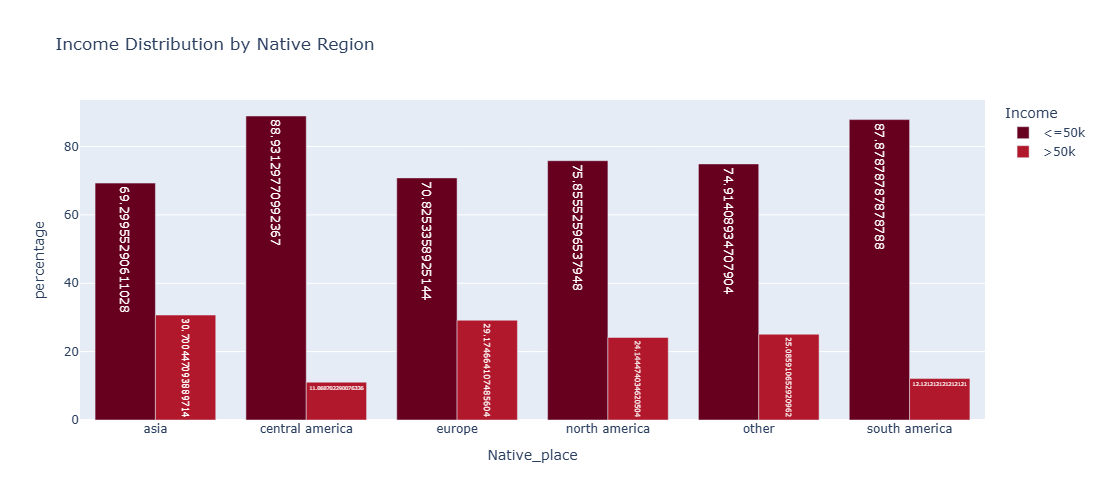

In [18]:
fig = px.bar(
    adult_df_income_native_region,
    x='Native_place',
    y='percentage',
    color='Income',
    title='Income Distribution by Native Region',
    barmode='group',
    height=500,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)

fig.show()
#fig.write_image(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.jpg'))
#fig.write_image(os.path.join(results_dir, 'Income_distribution_by_native_regio_plot.png'))
#fig.write_html(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.html'))


### Income Distribution by Race

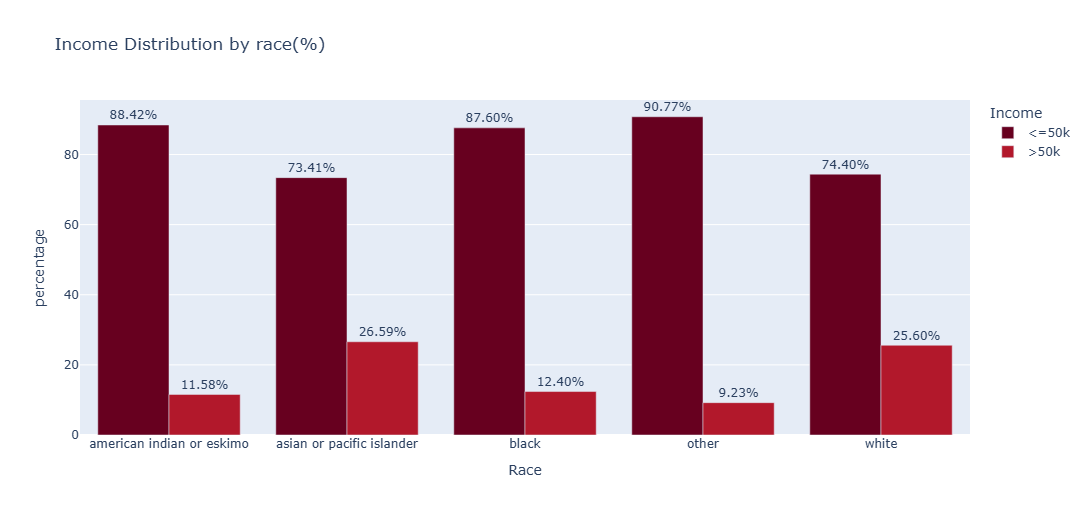

In [19]:
adult_df_income_race = adult_df.groupby(['Race', 'Income']).size().reset_index(name='total_income')
total_per_race = adult_df_income_race.groupby('Race')['total_income'].transform('sum')
adult_df_income_race['percentage'] = (adult_df_income_race['total_income']/total_per_race) * 100
adult_df_income_race

fig= px.bar(
    adult_df_income_race,
    x = 'Race',
    y = 'percentage',
    color= 'Income',
    title='Income Distribution by race(%)',
    barmode = 'group',
    height=500,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.show()

### Income Distribution by Education Level

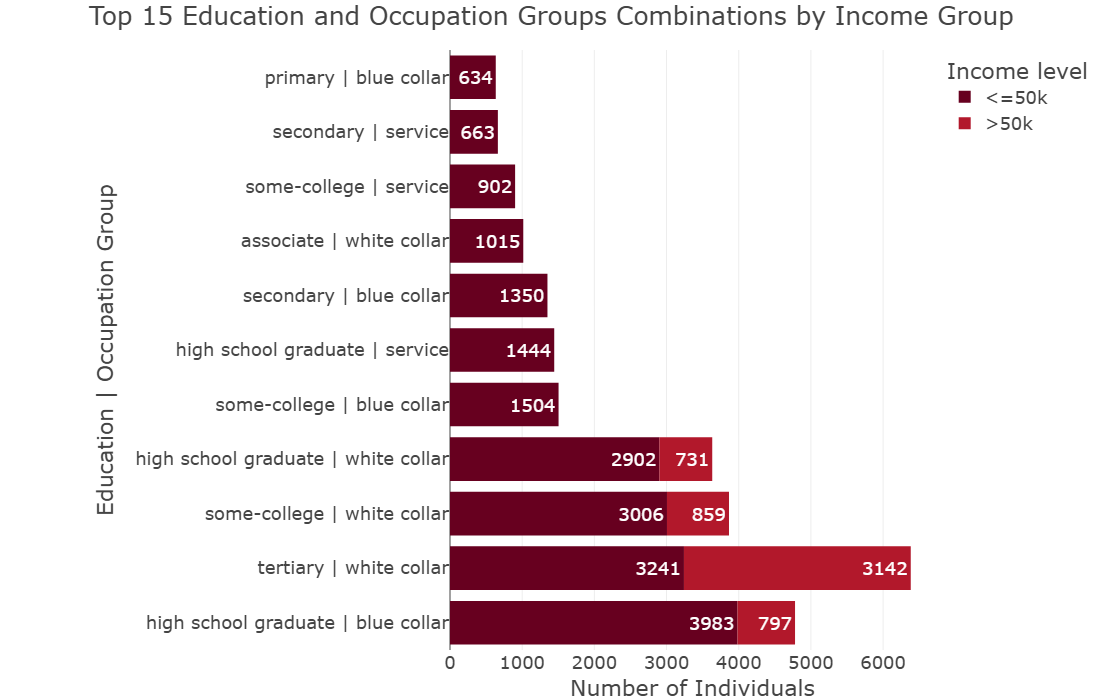

In [20]:
adult_df_income_edu_occ = (adult_df.groupby(['Education_Level', 'Occupation_grouped', 'Income']).size().reset_index(name = 'total'). sort_values('total', ascending=False))
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['Education_Level'] + " | " + adult_df_income_edu_occ['Occupation_grouped'])
adult_df_income_edu_occ

num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)
fig = px.bar(
    adult_df_combos,  
    x = "total",      
    y = "edu_occ",
    color = "Income",
    orientation= 'h',
    title =f"Top {num} Education and Occupation Groups Combinations by Income Group",

    height= 700,
    width= 1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text = 'total'
)
# fig.update_layout(template = "presentation", xaxis_title="Number of Individuals", yaxis_title = "Education | Occupation Group", legend_title = dict(text = 'Income level'), margin=dict(l = 450, r = 50, t = 50, b = 50), paper_bgcolor = "rgba(0,0,0,0)", plot_bgcolor ="rgba(0,0,0,0)")
# fig.update_traces(textposition = 'inside')
fig.show()
# fig.write_image(os.path.join(results_dir, 'Income_distribution_by_EduandOcc.jpg'))
# fig.write_image(os.path.join(results_dir, 'Income_distribution_by_EduandOcc.png'))
# fig.write_html(os.path.join(results_dir, 'Income_distribution_by_EduandOcc.html'))


In this notebook, we focus on **data preparation**, **cleaning**, and **preprocessing** for the **UCI Adult Income Dataset**, a popular dataset often used for classification tasks predicting whether an individual earns more or less than $50,000 annually based on demographic and work-related attributes.

Good data preprocessing is crucial for reliable and interpretable results in machine learning and analytics workflows. Here, we address common data issues such as **missing values, duplicates, and inconsistent categorical labels** while creating derived features to improve downstream analysis.


We start by importing essential Python libraries for data handling and manipulation.

- `pandas` for structured data operations.

- `numpy` for numerical operations.

- `os` for interacting with the operating system and directory structures.


## Define and Create Directory Paths

To ensure reproducibility andorganized storage, we programmatically create directories for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.


## Read in the data

We load the **Adult Income dataset** as a CSV file.

Key considerations here are:

- We treat `?` as missing values (`na_values = '?'`).
- We use `skipinitialspace = True` to remove extra spaces after delimeters which is common in text-based datasets.

After loading, we inspect the first few rows.


We also inspect the dataset's shape. We see that the data has *32,561* rows and *15* columns.

In addition, we check the data types using `.info`. 

## Data Cleaning
### 1. Assign proper column names to the columns

One of the most stricking things from the above inspection is that the dataset lacks explicit column headers. We manually assign descriptive meaningful column names based on the description of the [dataset](https://archive.ics.uci.edu/dataset/2/adult). This is critical for readability and interpretability in the subsequent steps


We inspect again to see whether they are properly assigned.

### 2. Understanding the dataset

Before proceeding with the cleaning, we would like to understanding the variables deeply. This would help guide the cleaning process. The subsequent tables detail the types, meaning and values or ranges of the variables in the dataset.

**Table 1: Summary table of the variables in the dataset**

| Variable         | Type        | Description                           | Values / Range (excluding nan)         |
|:----------------|:------------|:--------------------------------------|:----------------------|
| age              | Numeric     | Age in years                          | 17 – 90                |
| fnlwgt           | Numeric     | Final sampling weight                 | ~12,285 – 1,484,705    |
| education_num    | Numeric     | Education level in years              | 1 – 16                 |
| capital_gain     | Numeric     | Capital gain amounts (Profit from selling assets above purchase price within the survey year (in USD))                  | 0 – 99,999             |
| capital_loss     | Numeric     | Capital loss amounts (Loss from selling assets below purchase price within the survey year (in USD))                 | 0 – 4,356              |
| hours_per_week   | Numeric     | Weekly work hours                     | 1 – 99                 |
| workclass        | Categorical | Type of employment                    | 8 categories           |
| education        | Categorical | Highest level of education achieved   | 16 categories          |
| marital_status   | Categorical | Marital status                        | 7 categories           |
| occupation       | Categorical | Type of job                           | 14 categories          |
| relationship     | Categorical | Relationship within household         | 6 categories           |
| race             | Categorical | Ethnic/racial group                   | 5 categories           |
| sex              | Categorical | Gender                                 | 2 categories           |
| native_country   | Categorical | Country of origin                     | 41 categories          |
| income           | Categorical | Income category (target variable)     | 2 categories: <=50K, >50K |

**Table 2: Categorical Variables Table**
| Variable        | Unique Value         | Description                                                                 |
|:----------------|:--------------------|:----------------------------------------------------------------------------|
| workclass       | Private               | Works for a private, for-profit company                                      |
|                  | Self-emp-not-inc     | Self-employed without incorporated business status                           |
|                  | Self-emp-inc         | Self-employed with an incorporated business                                  |
|                  | Federal-gov          | Employed by the federal government                                           |
|                  | State-gov            | Employed by a state government                                               |
|                  | Local-gov            | Employed by a local government                                               |
|                  | Without-pay          | Works without receiving pay (e.g. unpaid family worker)                      |
|                  | Never-worked         | Has never worked in their lifetime                                           |
| education       | Bachelors             | Bachelor's degree                                                            |
|                  | Some-college         | Some college courses completed, no degree                                    |
|                  | 11th                 | 11th grade completed                                                         |
|                  | HS-grad              | High school graduate                                                         |
|                  | Prof-school          | Professional school (e.g. law, medicine)                                     |
|                  | Assoc-acdm           | Associate degree (academic)                                                  |
|                  | Assoc-voc            | Associate degree (vocational)                                                |
|                  | 9th                  | 9th grade completed                                                          |
|                  | 7th-8th              | 7th or 8th grade completed                                                   |
|                  | 12th                 | 12th grade, no diploma                                                       |
|                  | Masters              | Master's degree                                                              |
|                  | 1st-4th              | 1st to 4th grade completed                                                   |
|                  | 10th                 | 10th grade completed                                                         |
|                  | Doctorate            | Doctoral degree                                                              |
|                  | 5th-6th              | 5th or 6th grade completed                                                   |
|                  | Preschool            | Preschool education                                                          |
| marital-status  | Married-civ-spouse    | Married, living with spouse                                                  |
|                  | Divorced             | Divorced legally                                                             |
|                  | Never-married        | Never married                                                                |
|                  | Separated            | Separated legally but not divorced                                           |
|                  | Widowed              | Spouse deceased                                                              |
|                  | Married-spouse-absent| Married, spouse not present (e.g. estrangement)                              |
|                  | Married-AF-spouse    | Married to a spouse who is a member of the Armed Forces                      |
| occupation      | Tech-support          | Technical support jobs                                                       |
|                  | Craft-repair         | Skilled manual trade and repair jobs                                         |
|                  | Other-service        | Services not classified elsewhere                                            |
|                  | Sales                | Sales-related jobs                                                           |
|                  | Exec-managerial      | Executive and managerial roles                                               |
|                  | Prof-specialty       | Professional specialty occupations (e.g. scientist, lawyer)                 |
|                  | Handlers-cleaners    | Manual labor jobs involving cleaning, handling objects                       |
|                  | Machine-op-inspct    | Machine operators, inspectors                                                |
|                  | Adm-clerical         | Administrative and clerical jobs                                             |
|                  | Farming-fishing      | Agriculture, farming, fishing occupations                                    |
|                  | Transport-moving     | Transport and moving equipment operators                                     |
|                  | Priv-house-serv      | Private household service jobs                                               |
|                  | Protective-serv      | Protective service jobs (e.g. security, law enforcement)                     |
|                  | Armed-Forces         | Military service                                                             |
| relationship    | Wife                  | Female spouse                                                                |
|                  | Own-child            | Biological or adopted child                                                  |
|                  | Husband              | Male spouse                                                                  |
|                  | Not-in-family        | Not part of a family unit (e.g. living alone)                                |
|                  | Other-relative       | Other relative in household                                                  |
|                  | Unmarried            | Single person, not married                                                   |
| race            | White                 | White                                                                        |
|                  | Asian-Pac-Islander   | Asian or Pacific Islander                                                    |
|                  | Amer-Indian-Eskimo   | American Indian or Eskimo                                                    |
|                  | Other                | Other race not listed                                                        |
|                  | Black                | Black                                                                         |
| sex             | Female                | Female                                                                        |
|                  | Male                  | Male                                                                          |
| native-country  | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad-Tobago, Peru, Hong, Holland-Netherlands |                 |
| income          | <=50K                 | Income less than or equal to USD 50,000                                         |
|                  | >50K                  | Income greater than USD 50,000                                                  |

|                  | >50K                  | Income greater than USD 50,000


Using `.isnull().sum()`, we identify columns with missing values. They are:

- `workclass` with 1,836 missing values
- `occupation` with 1,843 missing values
- `native_country` with 583 missing values

We address these by:

- Imputing categorical missing values with `Unknown` for the columns `workclass` and `occupation`
- Imputing categorical missing values with `Other` for the column `native_country`

This has been done to preserve data consistency while acknowledging uncertainity.

We inspect one more time to ensure we don't have any missing values.

### 3. Removing Duplicates
Duplicates can distort statistical summaries and model performance. Using `.duplicated().sum()`, we count duplicate records.

We then inspect the duplicated records.

Finally, we remove them with `.drop_duplicates()`.

We can confirm that we have no duplicates left in the dataset at this juncture.


We also inspect the current shape of the dataset and see that we have *32,537* rows and *15* columns.

In [ ]:
### 5. Standardize Categorical Variables

**Remove any leading or trailing spaces and convert the strings to lowercase**

To prepare categorical variables for consistent processing, we first of all remove extra spaces and convert them to lowercase. This step ensures categorical variables are clean and consistently organized.
